In [1]:
# 1. Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')   # Authorize when prompted

# 2. Import pandas
import pandas as pd

# 3. Build the path to your CSV
#    Replace the path below with your actual file location.
csv_path = '/content/drive/MyDrive/sorted_df_var_202506171543.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:



rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
print(rf.dtypes)

lstm = pd.read_csv("/content/drive/MyDrive/LSTM_results/best_KGE/best_KGE_result_202506172152.csv") #update!
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)
print(lstm.dtypes)

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [3]:
merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')
#merged_df['KGE_y'] = merged_df['KGE_y']#.astype('float64')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)


merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

merged_df = merged_df[ ['site_no', 'KGE_x', 'KGE_y'] ]

merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

print(merged_df.dtypes)
print(merged_df)

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
     site_no  Random Forest   LSTM
0   13310800       0.926769  0.945
1   13192200       0.859797  0.933
2   13311450       0.907758  0.937
3   13311000       0.939221  0.947
4   13154500       0.729285  0.981
5   13092747       0.704597  0.932
6   13211205       0.889599  0.972
7   13311250       0.906752  0.960
8   13317660       0.915618  0.956
9   13310850       0.904339  0.895
10  13296000       0.875657  0.934
11  13150430       0.866316  0.905
12  13307000       0.909612  0.973
13  13341050       0.712652  0.921
14  13342500       0.752785  0.933
15  13190500       0.688853  0.654
16  13340600       0.943870  0.964
17  12305000       0.779612  0.924
18  13304050       0.498039  0.920
19  13340000       0.945548  0.982
20  13176400       0.841286  0.926
21  12322000       0.673606  0.900


In [4]:



# Example DataFrame
df = pd.DataFrame({
    'col': [[0.97042483], [0.82398472], [0.12345678]]
})

print(df)

# Convert list with single float to plain float
df['col'] = df['col'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

print(df)


            col
0  [0.97042483]
1  [0.82398472]
2  [0.12345678]
        col
0  0.970425
1  0.823985
2  0.123457


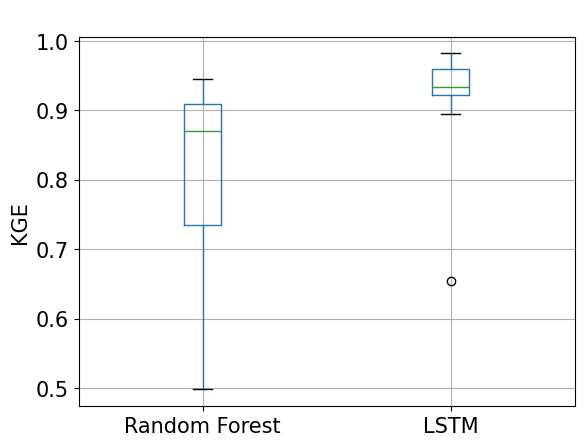

In [5]:


import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15

merged_df[[ 'Random Forest', 'LSTM']].boxplot()
plt.title(" ")
plt.ylabel("KGE")




plt.show()


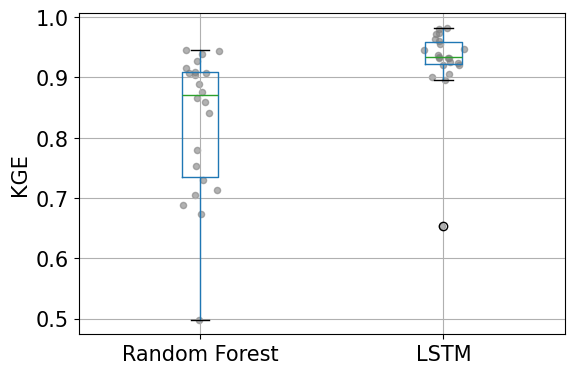

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))

merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

ax.set_ylabel( "KGE")
plt.tight_layout()

# Save the figure
plt.savefig("kge.png")  # Saves as a PNG file

plt.show()

In [7]:
print("rf:",rf.head())
print("lstm:",lstm.head())

merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')



#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
#merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

merged_df = merged_df[ ['site_no', 'RMSE', 'rmse'] ]

merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

print(merged_df.dtypes)
print("merged_df",merged_df)

rf:    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0           0  13310800           1103  0.315464 -0.217739  0.561662   
1           1  13192200            820  0.326945  0.144117  0.571791   
2           2  13311450           1098  0.357845 -0.174490  0.598202   
3           3  13311000           1101  0.386968 -0.117419  0.622068   
4           4  13154500           2088  0.410202 -0.041550  0.640470   

        NSE       KGE  std_dev_st      cv_q  inter_cv_q  inter_cv_st  range  \
0  0.874394  0.926769    1.726251  1.057303    0.415897     0.049465    8.5   
1  0.832725  0.859797    1.666903  0.489336    0.232474     0.042419   10.0   
2  0.908933  0.907758    2.037784  0.935469    0.292900     0.054506    9.9   
3  0.883396  0.939221    2.062030  1.093710    0.342235     0.049630   10.1   
4  0.693833  0.729285    1.277700  0.357561    0.236465     0.015865    8.7   

   autocorr_t_1  grid_std_ratio  grid_correlation  
0      0.923407        0.958528     

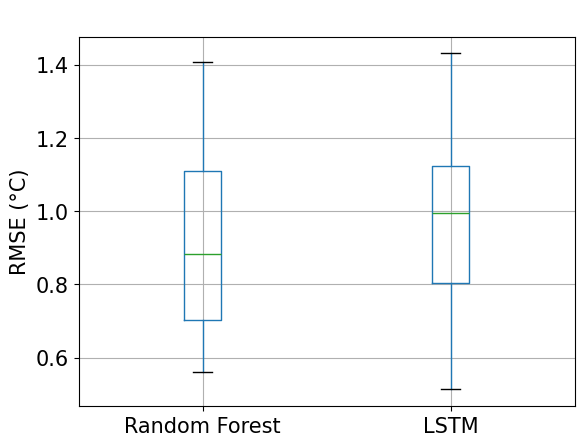

In [8]:
plt.rcParams['font.size'] = 15

merged_df[[ 'Random Forest', 'LSTM']].boxplot()
plt.title(" ")
plt.ylabel("RMSE (°C)")




plt.show()


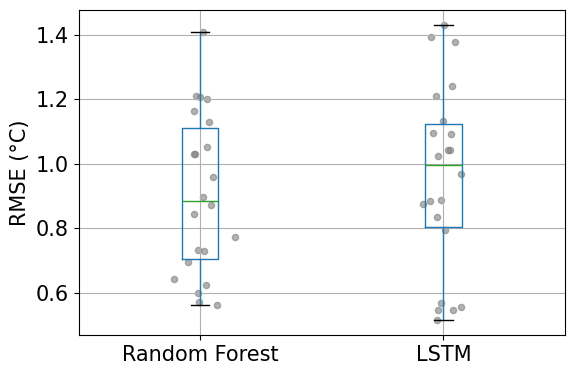

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))

merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

ax.set_ylabel( "RMSE (°C)")
plt.tight_layout()

# Save the figure
plt.savefig("rmse.png")  # Saves as a PNG file

plt.show()



In [10]:
# Assuming your DataFrame is named 'df'

merged_df['Difference'] =  merged_df['Random Forest'] -  merged_df['LSTM']
print(merged_df)

#row_with_max_difference =  merged_df.loc[ merged_df['Difference'].idxmax()]

# To get just the row without the Difference column:
#result = merged_df.loc[ merged_df['Random Forest'] -  merged_df['LSTM'].idxmax()]
#print(result)

     site_no  Random Forest      LSTM  Difference
0   13310800       0.561662  0.553821    0.007840
1   13192200       0.571791  0.792946   -0.221155
2   13311450       0.598202  0.566136    0.032065
3   13311000       0.622068  0.544358    0.077710
4   13154500       0.640470  0.546917    0.093553
5   13092747       0.696118  0.513246    0.182872
6   13211205       0.727619  1.042547   -0.314928
7   13311250       0.733434  0.874331   -0.140897
8   13317660       0.772190  1.091817   -0.319627
9   13310850       0.844064  0.887377   -0.043313
10  13296000       0.872014  1.240340   -0.368326
11  13150430       0.897075  0.882703    0.014372
12  13307000       0.957624  1.132614   -0.174990
13  13341050       1.028680  1.211277   -0.182597
14  13342500       1.031004  0.968252    0.062752
15  13190500       1.050931  0.834495    0.216436
16  13340600       1.130546  1.095614    0.034933
17  12305000       1.162926  1.393678   -0.230752
18  13304050       1.199496  1.041534    0.157962


In [11]:
import seaborn as sns


import matplotlib.pyplot as plt

# Melt the DataFrame to long format
df_melted =  merged_df[['KGE_x', 'KGE_y']].melt(var_name='Variable', value_name='Value')

# Create boxplot
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title("Boxplot of col1 and col2")
plt.show()


KeyError: "None of [Index(['KGE_x', 'KGE_y'], dtype='object')] are in the [columns]"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import numpy as np
import pandas as pd
np.random.seed(42)
data = pd.DataFrame({
    'group': np.repeat(['A', 'B'], 50),
    'value': np.concatenate([
        np.random.normal(loc=5, scale=1, size=50),
        np.random.normal(loc=6, scale=1.2, size=50)
    ])
})

# Create boxplot
sns.boxplot(x='group', y='value', data=data, whis=1.5, width=0.4, fliersize=0)

# Overlay each data point
sns.stripplot(x='group', y='value', data=data, color='black', size=4, jitter=True)

plt.title("Boxplot with Individual Points")
plt.show()
